In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/risk_behavior_dataset.csv')

In [3]:
df.shape

(73, 12)

In [4]:
df.head()

,Age,Gender,Education Level,Marital Status,Number of Dependents,Income,Credit Score,Debt-to-Income Ratio,Assets Value,Defaults Records,Employment Status,Years in Current Job
0,36,Female,Bachelor's,Divorced,2,56789,715,0.25,158765,2,Employed,6
1,37,Non-binary,Master's,Single,3,91234,789,0.18,176543,0,Employed,10
2,45,Male,Bachelor's,Divorced,1,65432,723,0.25,134567,1,Employed,6
3,39,Male,Master's,Single,0,92345,801,0.15,192345,0,Employed,10
4,40,Female,Master's,Married,1,76543,756,0.22,162345,0,Employed,8


In [6]:
print(df.isnull().sum())

age                     0
gender                  0
education_level         0
marital_status          0
number_of_dependents    0
income                  0
credit_score            0
debt-to-income_ratio    0
assets_value            0
defaults_records        0
employment_status       0
years_in_current_job    0
dtype: int64


CLEAN THE DATA

In [5]:
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
# Clean 'gender' values
def clean_gender(val):
    val = str(val).lower().strip()
    if val in ['female', 'f']:
        return 'Female'
    elif val in ['male', 'm']:
        return 'Male'
    elif val in ['non-binary', 'nonbinary', 'nb']:
        return 'Non-binary'
    else:
        return 'Other'

df['gender'] = df['gender'].apply(clean_gender)


FEATURE ENGINEERING

In [7]:
bins = [0, 25, 35, 45, 60, 100]
labels = ['<25', '26-35', '36-45', '46-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
def credit_category(score):
    if score < 580:
        return 'Poor'
    elif score < 670:
        return 'Fair'
    elif score < 740:
        return 'Good'
    elif score < 800:
        return 'Very Good'
    else:
        return 'Excellent'

df['credit_score_category'] = df['credit_score'].apply(credit_category)
df['income_bracket'] = pd.cut(df['income'],
                              bins=[0, 50000, 80000, 120000, 200000, 300000],
                              labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])


Exploratory Data Analysis (EDA)

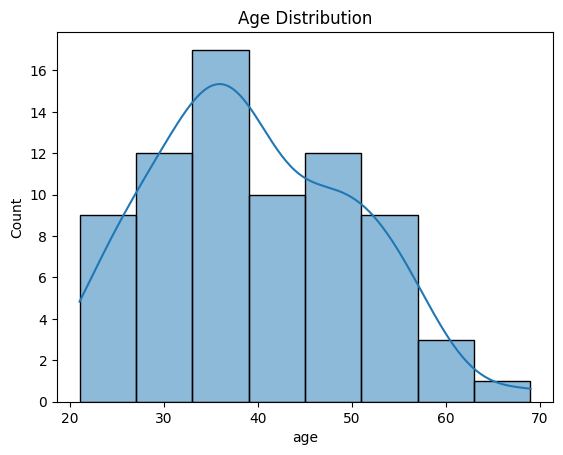

In [8]:
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

➤ Most individuals fall within the 30 to 50 age range, indicating a working-age dominated population.

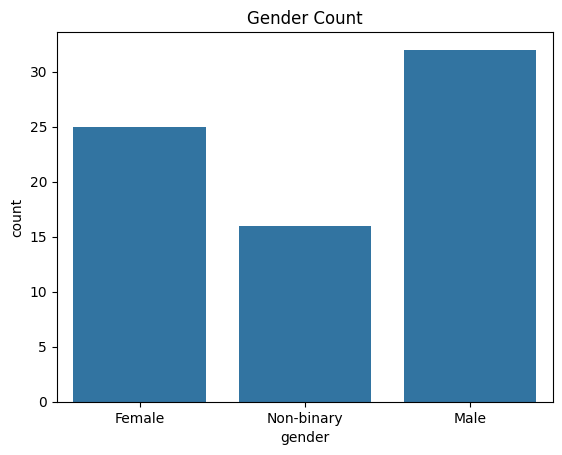

In [9]:
sns.countplot(data=df, x='gender')
plt.title("Gender Count")
plt.show()

➤ The dataset shows fairly balanced representation among Male, Female, and Non-binary individuals but comparitively larger number of males.

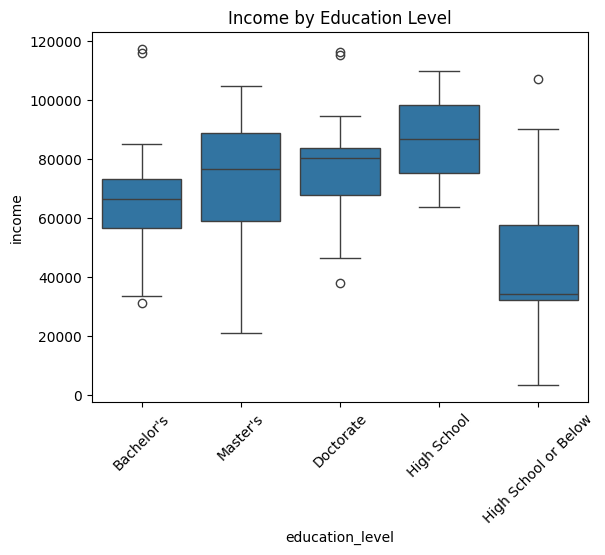

In [10]:
sns.boxplot(data=df, x='education_level', y='income')
plt.xticks(rotation=45)
plt.title("Income by Education Level")
plt.show()

➤Individuals with Doctorate and High school degrees tend to have higher median incomes compared to other education levels.

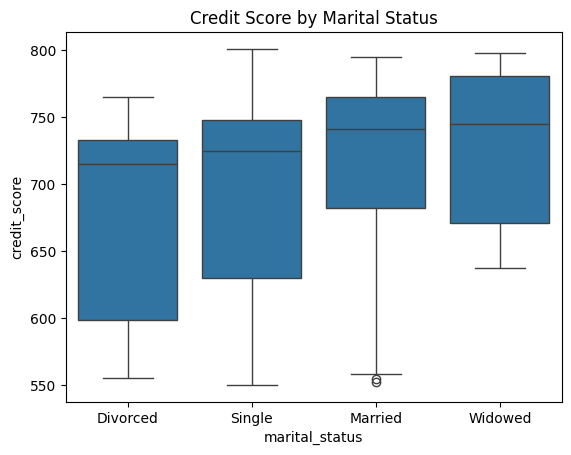

In [11]:
sns.boxplot(data=df, x='marital_status', y='credit_score')
plt.title("Credit Score by Marital Status")
plt.show()

➤ Single and widowed individuals generally have slightly higher credit scores compared to other marital groups.

Correlation Analysis

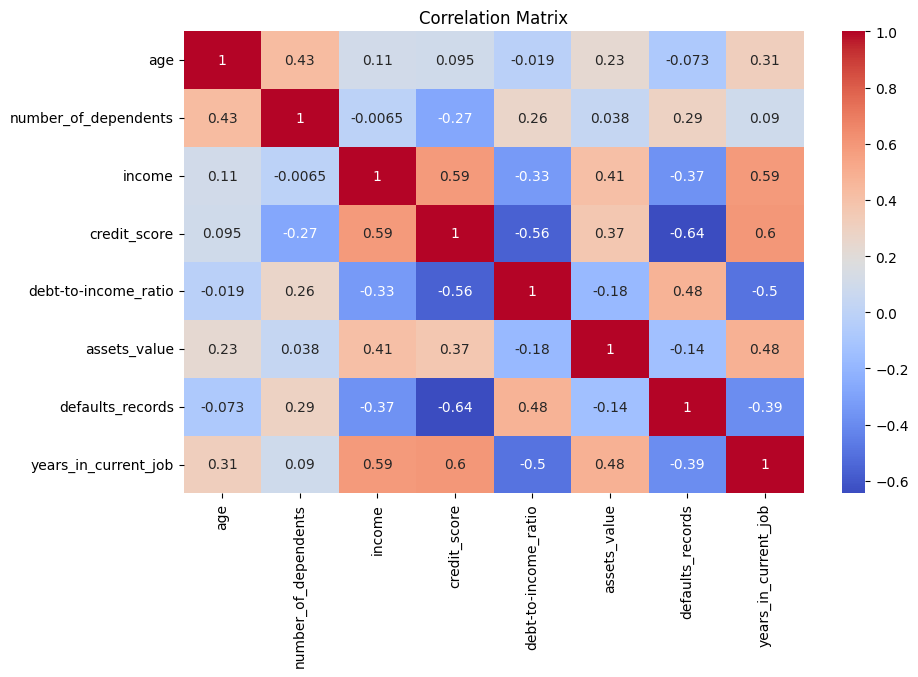

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

➤ Income has a moderate positive correlation with assets, and a slight negative correlation with debt-to-income ratio.

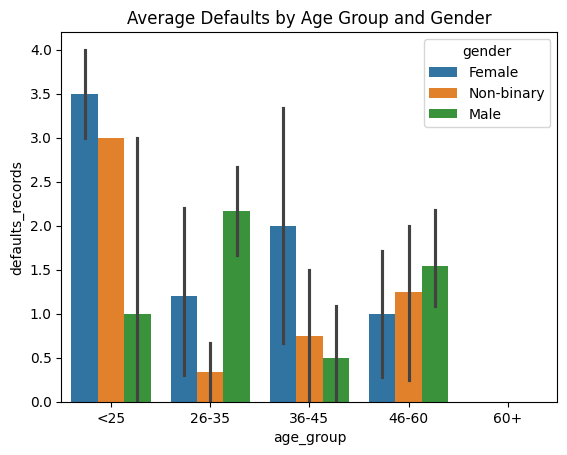

In [13]:
sns.barplot(data=df, x='age_group', y='defaults_records', hue='gender')
plt.title("Average Defaults by Age Group and Gender")
plt.show()

➤ Younger individuals (under 25), especially females and males, have slightly higher average default records.

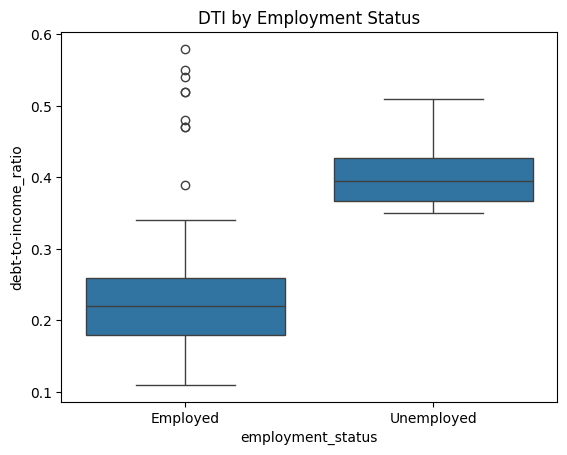

In [14]:
sns.boxplot(data=df, x='employment_status', y='debt-to-income_ratio')
plt.title("DTI by Employment Status")
plt.show()

➤ Unemployed individuals tend to have a higher and more varied debt-to-income ratio compared to employed individuals.

In [15]:
# Export cleaned dataset
df.to_csv("cleaned_risk_behavior_data.csv", index=False)
print("Cleaned data saved for Power BI.")

Cleaned data saved for Power BI.
